In [38]:
# Deep Learning 2 com MNIST
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

Text(0.5, 1.0, '0')

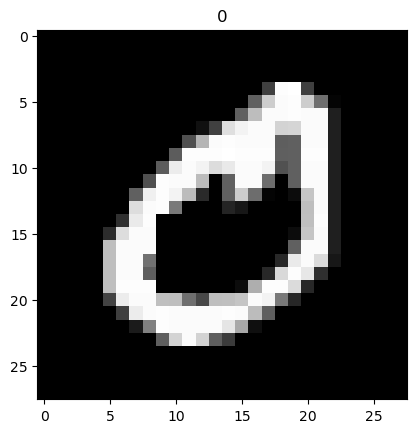

In [40]:
# Obtenção dos dados e divisão entre treinamento e teste
(x_treinamento, y_treinamento), (x_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(x_treinamento[21], cmap='gray')
plt.title(y_treinamento[21])

In [41]:
# Mudança de dimensão, originalmente uma matrix 28x28, agora um vetor 784
x_treinamento = x_treinamento.reshape((len(x_treinamento), np.prod(x_treinamento.shape[1:])))
x_teste = x_teste.reshape((len(x_teste), np.prod(x_teste.shape[1:])))
x_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [42]:
# Transformação dos dados para float para normalizar os dados
x_treinamento = x_treinamento.astype('float32')
x_teste = x_teste.astype('float32')

In [46]:
# Normalização (255 é o valor máximo de um pixel)
x_treinamento /= 255
x_teste /= 255

In [48]:
# Transformação para formato dummy (10 classes)
y_treinamento = to_categorical(y_treinamento, 10)
y_teste = to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [50]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem de neurônios, para evitar overfitting
modelo = Sequential()
modelo.add(Dense(units=64, activation='relu', input_dim=784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))
# Camada de saída -> softmax probabilidade
modelo.add(Dense(units=10, activation='softmax'))

In [52]:
# Visualização da rede
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Configuração dos parâmetros para treinamento
# Na variável histórica, temos os históricos de erros e accuracy
modelo.compile(optimizer='adam', loss='categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(x_treinamento, y_treinamento, epochs=20,
                       validation_data = (x_teste,y_teste))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7616 - loss: 0.7357 - val_accuracy: 0.9453 - val_loss: 0.1842
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - accuracy: 0.9315 - loss: 0.2360 - val_accuracy: 0.9597 - val_loss: 0.1386
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.9453 - loss: 0.1934 - val_accuracy: 0.9635 - val_loss: 0.1243
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.9525 - loss: 0.1690 - val_accuracy: 0.9653 - val_loss: 0.1133
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - accuracy: 0.9568 - loss: 0.1523 - val_accuracy: 0.9666 - val_loss: 0.1115
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9598 - loss: 0.1410 - val_accuracy: 0.9694 - val_loss: 0.1065
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9599 - loss: 0.1322 - val_accuracy: 0.9725 - val_loss: 0.0926
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9646 - loss: 0

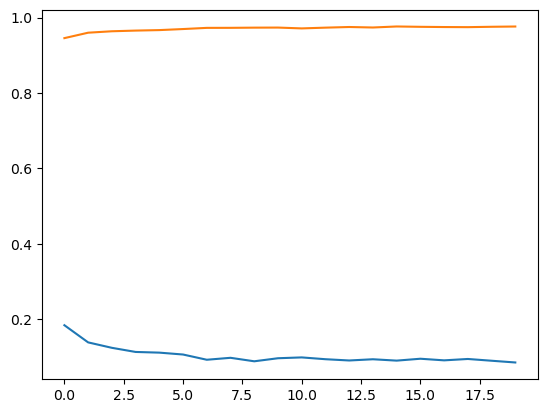

In [60]:
# Gráfico para visualizar erros e acurácia
historico.history.keys()
# Evolução de erro, azul
plt.plot(historico.history['val_loss'])
# Performance da rede
plt.plot(historico.history['val_accuracy'])

In [62]:
# Obtenção das previsões
previsoes = modelo.predict(x_teste)
previsoes

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step


array([[3.9324245e-11, 1.3412937e-09, 5.9424492e-06, ..., 9.9999130e-01,
        7.3182966e-09, 1.0773635e-06],
       [4.9843768e-10, 8.7427718e-05, 9.9988341e-01, ..., 3.9784804e-06,
        1.4957918e-07, 5.9071752e-13],
       [6.6587896e-10, 9.9998868e-01, 2.1167382e-07, ..., 5.5974809e-08,
        1.0846986e-05, 1.1968061e-09],
       ...,
       [6.1278836e-11, 1.2219081e-10, 3.1336910e-07, ..., 6.2043021e-08,
        2.6095393e-07, 1.6253391e-05],
       [1.0931948e-13, 1.1794438e-14, 7.3919339e-14, ..., 1.1246817e-15,
        2.8201117e-09, 8.1627920e-11],
       [1.1573387e-13, 3.2709160e-15, 3.9957030e-15, ..., 1.0359484e-21,
        3.4752344e-13, 9.0347458e-20]], dtype=float32)

In [64]:
# Valor máximo da matrix e geração da matriz confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 968,    1,    2,    1,    0,    0,    4,    1,    2,    1],
       [   0, 1126,    2,    1,    0,    0,    1,    0,    5,    0],
       [   2,    3, 1004,    7,    2,    1,    1,    4,    7,    1],
       [   0,    0,    9,  978,    0,   11,    0,    3,    7,    2],
       [   0,    0,    2,    0,  956,    0,    6,    1,    2,   15],
       [   2,    0,    0,    8,    1,  869,    3,    0,    7,    2],
       [   4,    3,    2,    0,    2,    4,  941,    0,    2,    0],
       [   2,    4,   16,    5,    0,    0,    0,  998,    0,    3],
       [   3,    1,    3,    4,    2,    2,    0,    4,  951,    4],
       [   3,    7,    0,    5,    8,    4,    2,    5,    5,  970]],
      dtype=int64)

In [66]:
# Prevendo um novo registro (4)
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [72]:
# De matriz para vetor
novo = x_treinamento[20]
novo = np.expand_dims(novo,axis=0)
# Previsao
pred = modelo.predict(novo)
# Maior valor
pred = [np.argmax(pred) for t in pred]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[4]